# Компьютерная лингвистика (лекция 3)

**Предобработка текста: векторные представления. Задача
классификации текста.**

*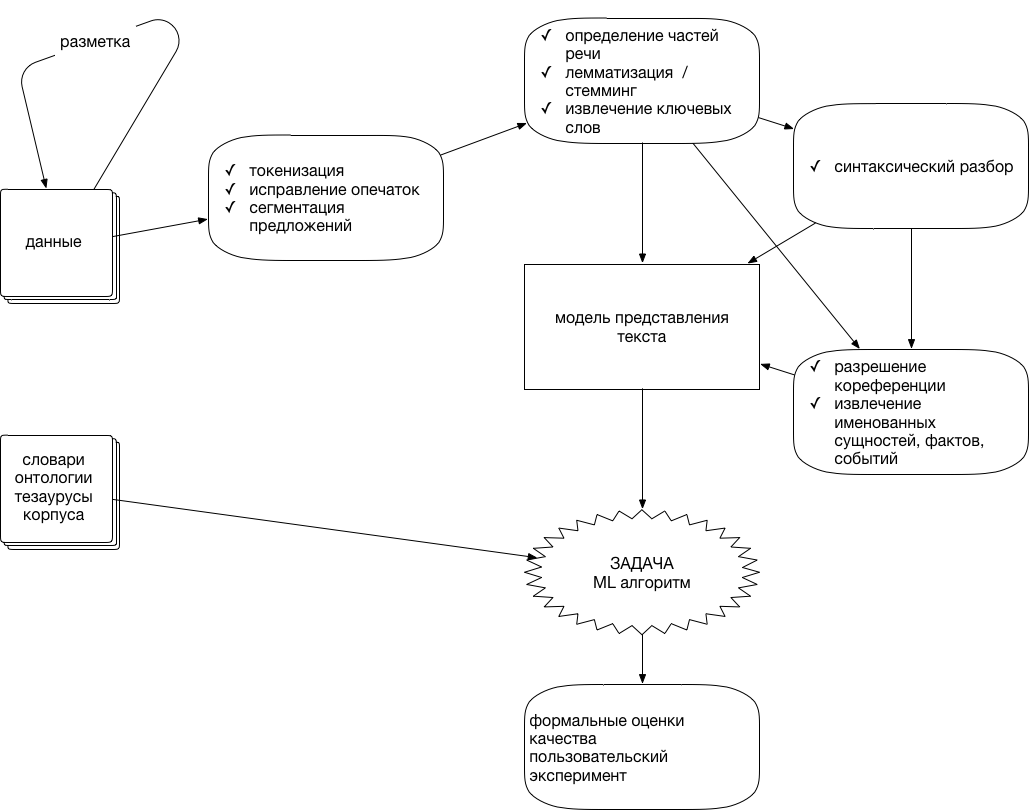

Ссылка на источник картинки: https://github.com/ancatmara/data-science-nlp/

# Отступление 1. Алгоритм машинного обучения

Рассмотрим простую линейную модель:
$$ \hat{y} = w_1 x_1 + w_2 x_2 + ... + w_k x_k + b,$$
где $\hat{y}$ - целевая переменная (что мы хотим предсказать), $x_j$ - $j$-ый признак объекта $x$, $w_j$ - вес $j$-го признака, $b$ - bias (смещение, свободный член), $k$ - количество признаков объектов. Иногда вместо $b$ используют обозначение $w_0$, а также вводят дополнительный фиктивный признак $x_0$, который всегда равен 1. (В такой модели будет $k+1$ признаков).

В матричном виде мы можем это записать так: 
$$ \hat{y} = Xw,$$ где $X$ - это матрица значений признаков, а $w$ - вектор значений весов.

Задача обучения с учителем заключается в том, чтобы при заданных найти на обучающей выборе такие значения $w$, чтобы на тестовой выборке предсказанные значения $\hat{y}$ как можно меньше отличались от реальных.

Различных типов моделей много. В задачах машинного обучения выбор модели - это важный этап. Однако, сейчас мы не будем рассматривать этот этап, просто предположим, что мы почему-то знаем, какую модель нам нужно выбрать.

Модель стараются выбрать так, чтобы можно было реализовать процедуру **минимизацию эмпирического риска**, то есть настройки параметров модели. В нашем примере настраивать нать $w$.

Например, минимизацию эмпирического риска для линейной регрессии. Вводим функционал качества (сумма значений функции потерь по всем элементам обучающей выборки):
$$ Q (w) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\sum\limits_{j=0}^k w_j x_j^{(i)}  - y^{(i)})^2 $$

$$Q(w) \rightarrow \min_w$$

Минимизация функции потерь происходит методом градиентного спуска.


Линейную модель можно использовать для решения задани классификации. Например так:
$$ \hat{y} = sign(Xw),$$
где $sign$ функция, которая показывает знак выражения, записанного в скобках. И тогда $\hat{y} = \lbrace -1, 1 \rbrace$

*Задача регрессии отличается от задачи классификации только допустимыми значениями $\hat{y}$. В задачи классификации это конечное множество. В примере выше в множестве всего два элемента. А для задачи регрессии допустимыми значениями $\hat{y}$ были все действительные числа.*


В задаче классификации выбирают другую функцию потерь. Вводят понятие отступа (margin) объекта:
$$ M(x_i) = y_i*\hat{y_i}$$

То есть отступ - это произведение предсказанного значения на истинное значение. Отступ можно понимать как «степень погруженности» объекта в свой класс. Чем меньше значение отступа $M(x_i)$, тем ближе объект подходит к границе классов. Отступ $M(x_i)$ отрицателен тогда и только тогда, когда алгоритм $a(x,w)$ допускает ошибку на объекте $x_i$. Число ошибок классификации можно записать через отступы (это и есть эмпирический риск в задаче классификации для линейной модели):
$$ Q(w) = \sum\limits_{i=1}^\ell [M(x_i)<0]$$
В этой формуле внутри суммы используется [скобка Айверсона](https://ru.wikipedia.org/wiki/%D0%A1%D0%BA%D0%BE%D0%B1%D0%BA%D0%B0_%D0%90%D0%B9%D0%B2%D0%B5%D1%80%D1%81%D0%BE%D0%BD%D0%B0).

Под знаком суммы стоит пороговая функция потерь, поэтому данный функционал не является ни выпуклым, ни даже непрерывным, и минимизировать его неудобно. Идея заключается в том, чтобы заменить пороговую функцию потерь непрерывной оценкой сверху:

$$ [M<0]  \leqslant  \ln (1 + e^{-M})$$

$$Q(w) = \sum_{i=1}^{\ell} \ln (1 + e^{-M}) \rightarrow \min_w$$

И эта задача тоже решается градиентным спуском.

На самом деле, ровно такая модель реализуется одним нейроном.

$$ \hat{y} = \psi (w_1 x_1 + w_2 x_2 + ... + w_k x_k + b)$$

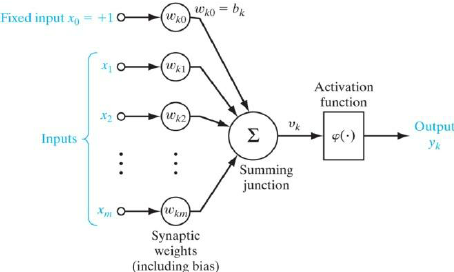

# Задача классификации текста

Классификация текстов означает отнесение каждого документа
к определенному классу с заранее известными параметрами. Очень близка к классификации задача рубрицирования текста  — отнесение текста к одной из заранее известных тематических рубрик (обычно рубрики образуют иерархическое дерево тематик).

Задача классификации получает все большее распространение, она давно и относительно успешно решается, например, при распознавании спама, определения эмоциоанльной окраски (тональности, сентимента) текста, 
автоматического определение языка текста, показа более релевантной рекламы. Как часть задачи она решается при формировании новостной ленты в социальных сетях.

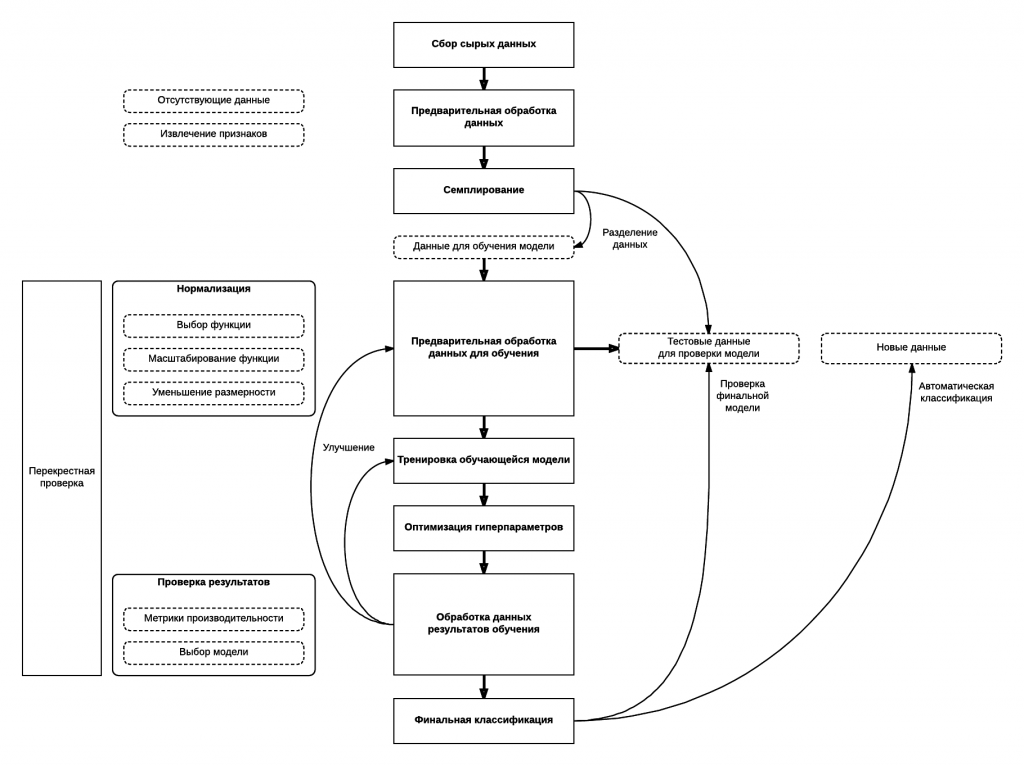

# Модели представления текста

## Мешок слов (BoW, bag of words)

Хотя лучше говорить не про мешок слов, а про мешок n-грамм.

Допустим, мы хотим применить вот такую модель для классификации текстов. Например, хотим определять спам и не спам.
$$ \hat{y} = \psi (w_1 x_1 + w_2 x_2 + ... + w_k x_k + b)$$

$\hat{y} = \lbrace spam, ham \rbrace$

$w_i$ и $b$ - это параметры, которые нужно найти в процессе обучения (настройки, fitting) модели.

А что такое для текстов $x_i$? Нам нужно получить преобразование текстов в численный вектор, с которым может работать стандартный алгоритм машинного обучения. Как это сделать?

Тут может быть много разных ответов. Самая простая идея - это 0 или 1, где 0 - если соответствующего токена нет в тексте, а 1 - если есть.

### n-граммы

Самые мелкие структуры языка, с которыми мы работаем, называются **n-граммами**.
У n-граммы есть параметр n - количество слов, которые попадают в такое представление текста.
* Если n = 1 - то мы смотрим на то, сколько раз каждое слово встретилось в тексте. Получаем _униграммы_
* Если n = 2 - то мы смотрим на то, сколько раз каждая пара подряд идущих слов, встретилась в тексте. Получаем _биграммы_

Подсчитав количество этих n-грам в текстах, мы получим искомые численные представления.


<img src="https://drive.google.com/uc?id=1jHmkrGZTMawM46Yzxh243Ur1y5pYKzrl" 
alt="IMAGE ALT TEXT HERE" width="600" border="0" />

Так как результат не зависит от порядка слов в текстах, то говорят, что такая модель представления текстов в виде векторов получается из *гипотезы представления текста как мешка слов*

In [ ]:
from nltk import ngrams

Прежде чем получать n-граммы, нужно разделить текст на токены (то есть сделать *токенизацию*) и, возможно, другие операции предобработки (lowercase, удаление пунктуации). 

In [ ]:
text = '''Лежу и мыслю об одном:
Вот дальний город, вот наш дом,
Вот сад, где прыгают гимнасты,
Куда сходились мы так часто.
О, милый дом!.. о, твой порог!
Я так устал, так изнемог...'''

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
import string
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
tokens = word_tokenize(text)
punct = string.punctuation + ".."+ "..."
tokens = [token.lower() for token in tokens if token not in punct]
print(tokens)
len(tokens)

['лежу', 'и', 'мыслю', 'об', 'одном', 'вот', 'дальний', 'город', 'вот', 'наш', 'дом', 'вот', 'сад', 'где', 'прыгают', 'гимнасты', 'куда', 'сходились', 'мы', 'так', 'часто', 'о', 'милый', 'дом', 'о', 'твой', 'порог', 'я', 'так', 'устал', 'так', 'изнемог']


32

In [ ]:
list(ngrams(tokens, 1)) # униграммы

[('лежу',),
 ('и',),
 ('мыслю',),
 ('об',),
 ('одном',),
 ('вот',),
 ('дальний',),
 ('город',),
 ('вот',),
 ('наш',),
 ('дом',),
 ('вот',),
 ('сад',),
 ('где',),
 ('прыгают',),
 ('гимнасты',),
 ('куда',),
 ('сходились',),
 ('мы',),
 ('так',),
 ('часто',),
 ('о',),
 ('милый',),
 ('дом',),
 ('о',),
 ('твой',),
 ('порог',),
 ('я',),
 ('так',),
 ('устал',),
 ('так',),
 ('изнемог',)]

In [ ]:
list(ngrams(tokens, 2)) # биграммы

[('лежу', 'и'),
 ('и', 'мыслю'),
 ('мыслю', 'об'),
 ('об', 'одном'),
 ('одном', 'вот'),
 ('вот', 'дальний'),
 ('дальний', 'город'),
 ('город', 'вот'),
 ('вот', 'наш'),
 ('наш', 'дом'),
 ('дом', 'вот'),
 ('вот', 'сад'),
 ('сад', 'где'),
 ('где', 'прыгают'),
 ('прыгают', 'гимнасты'),
 ('гимнасты', 'куда'),
 ('куда', 'сходились'),
 ('сходились', 'мы'),
 ('мы', 'так'),
 ('так', 'часто'),
 ('часто', 'о'),
 ('о', 'милый'),
 ('милый', 'дом'),
 ('дом', 'о'),
 ('о', 'твой'),
 ('твой', 'порог'),
 ('порог', 'я'),
 ('я', 'так'),
 ('так', 'устал'),
 ('устал', 'так'),
 ('так', 'изнемог')]

In [ ]:
list(ngrams(tokens, 5)) # ... пентаграммы

[('лежу', 'и', 'мыслю', 'об', 'одном'),
 ('и', 'мыслю', 'об', 'одном', 'вот'),
 ('мыслю', 'об', 'одном', 'вот', 'дальний'),
 ('об', 'одном', 'вот', 'дальний', 'город'),
 ('одном', 'вот', 'дальний', 'город', 'вот'),
 ('вот', 'дальний', 'город', 'вот', 'наш'),
 ('дальний', 'город', 'вот', 'наш', 'дом'),
 ('город', 'вот', 'наш', 'дом', 'вот'),
 ('вот', 'наш', 'дом', 'вот', 'сад'),
 ('наш', 'дом', 'вот', 'сад', 'где'),
 ('дом', 'вот', 'сад', 'где', 'прыгают'),
 ('вот', 'сад', 'где', 'прыгают', 'гимнасты'),
 ('сад', 'где', 'прыгают', 'гимнасты', 'куда'),
 ('где', 'прыгают', 'гимнасты', 'куда', 'сходились'),
 ('прыгают', 'гимнасты', 'куда', 'сходились', 'мы'),
 ('гимнасты', 'куда', 'сходились', 'мы', 'так'),
 ('куда', 'сходились', 'мы', 'так', 'часто'),
 ('сходились', 'мы', 'так', 'часто', 'о'),
 ('мы', 'так', 'часто', 'о', 'милый'),
 ('так', 'часто', 'о', 'милый', 'дом'),
 ('часто', 'о', 'милый', 'дом', 'о'),
 ('о', 'милый', 'дом', 'о', 'твой'),
 ('милый', 'дом', 'о', 'твой', 'порог'),
 ('д

## Пример классификации

К сожалению, на русском языке всё ещё очень мало годных наборов данных. Набор данных нашёл тут: https://github.com/sismetanin/rureviews

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Machine Learning/Data/women-clothing-accessories.csv', sep='\t', usecols=[0, 1])

In [ ]:
data.head()

,review,sentiment
0,качество плохое пошив ужасный (горловина напер...,negative
1,"Товар отдали другому человеку, я не получила п...",negative
2,"Ужасная синтетика! Тонкая, ничего общего с пре...",negative
3,"товар не пришел, продавец продлил защиту без м...",negative
4,"Кофточка голая синтетика, носить не возможно.",negative


In [ ]:
data.sample(5)

,review,sentiment
74100,"Заказываю не первый раз, все супер!",positive
35607,Заказ пришёл за две недели. Продавец отправил ...,neautral
77675,"Материал хороший, пошив понравился.",positive
62561,"Качество отличное, только не по колено, а подл...",positive
17358,"Ожидала лучшего,но пришло что то не понятное.....",negative


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data.review, data.sentiment, train_size = 0.7)

In [ ]:
data.sentiment.value_counts()

negative    30000
positive    30000
neautral    30000
Name: sentiment, dtype: int64

In [ ]:
y_train.value_counts()

positive    21025
negative    20991
neautral    20983
Name: sentiment, dtype: int64

На начальном этапе нам будет достаточно тех инструментов, которые уже есть в библиотеке **sklearn**.

Самый простой способ извлечь признаки из текстовых данных -- векторизаторы - использовать класс `CountVectorizer`

Объект `CountVectorizer` делает следующую вещь:
* строит для каждого документа (каждой пришедшей ему строки) вектор размерности `n`, где `n` -- количество слов или n-грам во всём корпусе
* заполняет каждый i-тый элемент количеством вхождений слова в данный документ

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

Инициализируем `CountVectorizer()`, указав в качестве признаков униграммы, биграммы и триграммы:

In [ ]:
vectorizer = CountVectorizer(ngram_range=(1, 3))

После инициализации _vectorizer_ можно обучить на наших данных. 

Для обучения используем обучающую выборку ```x_train```, но в отличие от классификатора мы используем метод ```fit_transform()```: сначала обучаем наш векторизатор, а потом сразу применяем его к нашему набору данных. 

In [ ]:
vectorized_x_train = vectorizer.fit_transform(x_train)

Так как результат не зависит от порядка слов в текстах, то говорят, что такая модель представления текстов в виде векторов получается из *гипотезы представления текста как мешка слов*

В `vectorizer.vocabulary_` лежит словарь, отображение слов в их индексы:

In [ ]:
list(vectorizer.vocabulary_.items())[:10]

[('качество', 382892),
 ('не', 540974),
 ('соответствует', 1010330),
 ('такой', 1056500),
 ('сумме', 1040894),
 ('плохое', 751887),
 ('нити', 601954),
 ('торчат', 1101990),
 ('защелка', 337745),
 ('отлетела', 691749)]

In [ ]:
vectorized_x_train.shape

(62999, 1239801)

Так как теперь у нас есть **численное представление** и набор входных признаков, то мы можем обучить нашу модель. 

Для анализа текста часто применяют в качестве модели [наивный байесовский классификатор](https://ru.wikipedia.org/wiki/%D0%9D%D0%B0%D0%B8%D0%B2%D0%BD%D1%8B%D0%B9_%D0%B1%D0%B0%D0%B9%D0%B5%D1%81%D0%BE%D0%B2%D1%81%D0%BA%D0%B8%D0%B9_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%82%D0%BE%D1%80).

In [ ]:
from sklearn.naive_bayes import MultinomialNB # наивный байесовский классификатор

In [ ]:
clf = MultinomialNB()
clf.fit(vectorized_x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

С тестовыми данными нужно проделать то же самое, что и с данными для обучения: сделать из текстов вектора, которые можно передавать в классификатор для прогноза класса объекта. 

У нас уже есть обученный векторизатор ```vectorizer```, поэтому используем метод ```transform()``` (просто применить его), а не ```fit_transform``` (обучить и применить).

In [ ]:
vectorized_x_test = vectorizer.transform(x_test)

Как раньше, для получения прогноза у обученного классификатора используем метод ```predict()```.

С помощью функции ```classification_report()```, которая считает сразу несколько метрик качества классификации, посмотрим на то, насколько хорошо мы предсказываем положительную или отрицательную тональность твита .

In [ ]:
from sklearn.metrics import * 

In [ ]:
pred = clf.predict(vectorized_x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

    neautral       0.62      0.66      0.64      9017
    negative       0.73      0.68      0.71      9009
    positive       0.86      0.86      0.86      8975

    accuracy                           0.73     27001
   macro avg       0.74      0.74      0.74     27001
weighted avg       0.74      0.73      0.74     27001



### Отступление 2. Оценка качества классификациии


**Полнота** (Sensitivity, True Positive Rate, Recall, Hit Rate) отражает какой процент объектов положительного класса мы правильно классифицировали.

**Точность** (Precision, Positive Predictive Value) отражает какой процент положительных объектов (т.е. тех, что мы считаем положительными) правильно классифицирован. (Не путать с Accuracy!)

Легко построить алгоритм со 100%-й полнотой: он все объекты относит к классу 1, но при этом точность может быть очень низкой. Нетрудно построить алгоритм с близкой к 100% точностью: он относит к классу 1 только те объекты, в которых уверен, при этом полнота может быть низкая.

**F1-мера** (F1 score) является средним гармоническим точности и полноты, максимизация этого функционала приводит к одновременной максимизации этих двух «ортогональных критериев»

$$F_1 = \frac{2}{\mathrm{recall}^{-1} + \mathrm{precision}^{-1}} = 2 \cdot \frac{\mathrm{precision} \cdot \mathrm{recall}}{\mathrm{precision} + \mathrm{recall}} = \frac{\mathrm{tp}}{\mathrm{tp} + \frac12 (\mathrm{fp} + \mathrm{fn}) } $$

Также рассматривают весовое среднее гармоническое точности и полноты –  $F_\beta$-меру:

$$F_\beta = (1 + \beta^2) \cdot \frac{\mathrm{precision} \cdot \mathrm{recall}}{(\beta^2 \cdot \mathrm{precision}) + \mathrm{recall}} = \frac {(1 + \beta^2) \cdot \mathrm{tp} }{(1 + \beta^2) \cdot \mathrm{tp} + \beta^2 \cdot \mathrm{fn} + \mathrm{fp}}\,$$

Изменение $\beta$ позволяет делать один из критериев (точность или полноту) важнее при оптимизации.

## Мешок символьных n-gram

В некоторых задачах в качестве признаков могут быть использщованы, n-граммы символов. Для этого необходимо установить в ```CountVectorizer()``` параметр ```analyzer = 'char'```, то есть анализировать символы.

In [ ]:
# инициализируем векторайзер для символов
char_vectorizer = CountVectorizer(analyzer='char', ngram_range=(2, 8))

# обучаем его и сразу применяем к x_train
char_vectorized_x_train = char_vectorizer.fit_transform(x_train)

# инициализируем и обучаем классификатор
clf = MultinomialNB()
clf.fit(char_vectorized_x_train, y_train)

# применяем обученный векторайзер к тестовым данным
char_vectorized_x_test = char_vectorizer.transform(x_test)

# получаем предсказания и выводим информацию о качестве
pred = clf.predict(char_vectorized_x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

    neautral       0.60      0.71      0.65      9017
    negative       0.74      0.64      0.68      9009
    positive       0.88      0.84      0.86      8975

    accuracy                           0.73     27001
   macro avg       0.74      0.73      0.73     27001
weighted avg       0.74      0.73      0.73     27001



Cимвольные n-граммы используются, например, для задачи определения языка. Ещё одна замечательная особенность признаков-символов - для них не нужна токенизация и лемматизация, можно использовать такой подход для языков, у которых нет готовых анализаторов.

## TF-IDF векторизация

`TfidfVectorizer` делает то же, что и `CountVectorizer`, но в качестве значений выдает **tf-idf** каждого слова.

Как считается tf-idf:

**TF (term frequency)** – относительная частотность слова в документе:
$$ TF(t,d) = \frac{n_{t}}{\sum_k n_{k}} $$

**IDF (inverse document frequency)** – обратная частота документов, в которых есть это слово:
$$ IDF(t, D) = \mbox{log} \frac{|D|}{|{d : t \in d}|} $$

Перемножаем их:
$$TFIDF(t, d, D) = TF(t,d) \times IDF(i, D)$$

Cмысл: если слово часто встречается в одном документе, но в целом по корпусу встречается в небольшом 
количестве документов, у него высокий TF-IDF.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

Действуем аналогично, как с ```CountVectorizer()```:

In [ ]:
# инициализируем векторизатор
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 4), max_df = 0.95, min_df = 5)

In [ ]:
# обучаем его и сразу применяем к x_train
tfidf_vectorized_x_train = tfidf_vectorizer.fit_transform(x_train)

In [ ]:
# инициализируем и обучаем классификатор
clf = MultinomialNB()
clf.fit(tfidf_vectorized_x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
# применяем обученный векторизатор к тестовым данным
tfidf_vectorized_x_test = tfidf_vectorizer.transform(x_test)

# получаем предсказания и выводим информацию о качестве
pred = clf.predict(tfidf_vectorized_x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

    neautral       0.60      0.70      0.65      9017
    negative       0.75      0.63      0.69      9009
    positive       0.86      0.86      0.86      8975

    accuracy                           0.73     27001
   macro avg       0.74      0.73      0.73     27001
weighted avg       0.74      0.73      0.73     27001



Посмотрим, как один из супер-значительных токенов справится с классификацией без машинного обучения.

In [ ]:
cool_token = 'супер'
pred = ['positive' if cool_token in review else 'negative' for review in x_test]
print(classification_report(pred, y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    neautral       0.00      0.00      0.00         0
    negative       1.00      0.34      0.51     26188
    positive       0.08      0.88      0.15       813

    accuracy                           0.36     27001
   macro avg       0.36      0.41      0.22     27001
weighted avg       0.97      0.36      0.50     27001



In [ ]:
bad_token = 'ужасный'
pred = ['negative' if cool_token in review else 'positive' for review in x_test]
print(classification_report(pred, y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    neautral       0.00      0.00      0.00         0
    negative       0.00      0.03      0.00       813
    positive       0.92      0.32      0.47     26188

    accuracy                           0.31     27001
   macro avg       0.31      0.11      0.16     27001
weighted avg       0.89      0.31      0.46     27001



## Добавим лемматизацию

In [ ]:
!pip install pymorphy2

     |████████████████████████████████| 61kB 2.9MB/s eta 0:00:011
     |████████████████████████████████| 8.2MB 6.0MB/s 


In [ ]:
from pymorphy2 import MorphAnalyzer
pymorphy2_analyzer = MorphAnalyzer()

In [ ]:
sent2 = word_tokenize('вижу три села')
lemmatized_output = ' '.join([pymorphy2_analyzer.parse(w)[0].normal_form for w in sent2])

In [ ]:
lemmatized_output

'видеть три село'

In [ ]:
data.review

0        качество плохое пошив ужасный (горловина напер...
1        Товар отдали другому человеку, я не получила п...
2        Ужасная синтетика! Тонкая, ничего общего с пре...
3        товар не пришел, продавец продлил защиту без м...
4            Кофточка голая синтетика, носить не возможно.
                               ...                        
89995    сделано достаточно хорошо. на ткани сделан рис...
89996    Накидка шикарная. Спасибо большое провдо линяе...
89997    спасибо большое ) продовца рекомендую.. заказа...
89998    Очень довольна заказом! Меньше месяца в РБ.  К...
89999    хорошая куртка. постороннего запаха нет. швы р...
Name: review, Length: 90000, dtype: object

Лемматизировать нужно и обучающую выборку и тестовую. Поэтому просто лемматизируем весь датасет. (Это довольно долго выполняется).

In [ ]:
# приведение текста к нижнему регистру
review_list = data.review.str.lower()

# токенизация
review_list = [word_tokenize(review) for review in review_list]

# лемматизация
review_list = [[pymorphy2_analyzer.parse(word) for word in review] for review in review_list]
review_list = [[word[0].normal_form for word in review] for review in review_list]

review_list = [' '.join(review) for review in review_list]

In [ ]:
data.review = review_list

In [ ]:
data.sample(5)

,review,sentiment
25372,"не прийти , деньга не вернуть продавец пол год...",negative
73514,"очень классный трусик . заказывать 11.11.17 , ...",positive
69866,хороший кофта !,positive
7201,меховой подкладка полный говнищий ! лезть как ...,negative
31799,"носить не быть , на 160 короткий",neautral


Теперь снова разделим на обучающую и тестовую, повтрим векторизации и запустим классификаторы.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data.review, data.sentiment, train_size = 0.7)

In [ ]:
# символьные n-граммы
char_vectorizer = CountVectorizer(analyzer='char', ngram_range=(2, 8))
char_vectorized_x_train = char_vectorizer.fit_transform(x_train)
clf = MultinomialNB()
clf.fit(char_vectorized_x_train, y_train)
char_vectorized_x_test = char_vectorizer.transform(x_test)
pred = clf.predict(char_vectorized_x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

    neautral       0.59      0.71      0.65      8988
    negative       0.74      0.63      0.68      9067
    positive       0.87      0.84      0.86      8946

    accuracy                           0.73     27001
   macro avg       0.74      0.73      0.73     27001
weighted avg       0.74      0.73      0.73     27001



In [ ]:
# tf-idf
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 4), max_df = 0.95, min_df = 5)
tfidf_vectorized_x_train = tfidf_vectorizer.fit_transform(x_train)
# инициализируем и обучаем классификатор
clf = MultinomialNB()
clf.fit(tfidf_vectorized_x_train, y_train)
# применяем обученный векторизатор к тестовым данным
tfidf_vectorized_x_test = tfidf_vectorizer.transform(x_test)

# получаем предсказания и выводим информацию о качестве
pred = clf.predict(tfidf_vectorized_x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

    neautral       0.59      0.71      0.65      8988
    negative       0.75      0.62      0.68      9067
    positive       0.87      0.85      0.86      8946

    accuracy                           0.73     27001
   macro avg       0.74      0.73      0.73     27001
weighted avg       0.74      0.73      0.73     27001



Наверное, это можно было бы улучшить, например удалением всех небуквенных символов. Но в принципе сама по себе задача сентимент-анализа часто имеет не очень высокую точность.


# Заключение

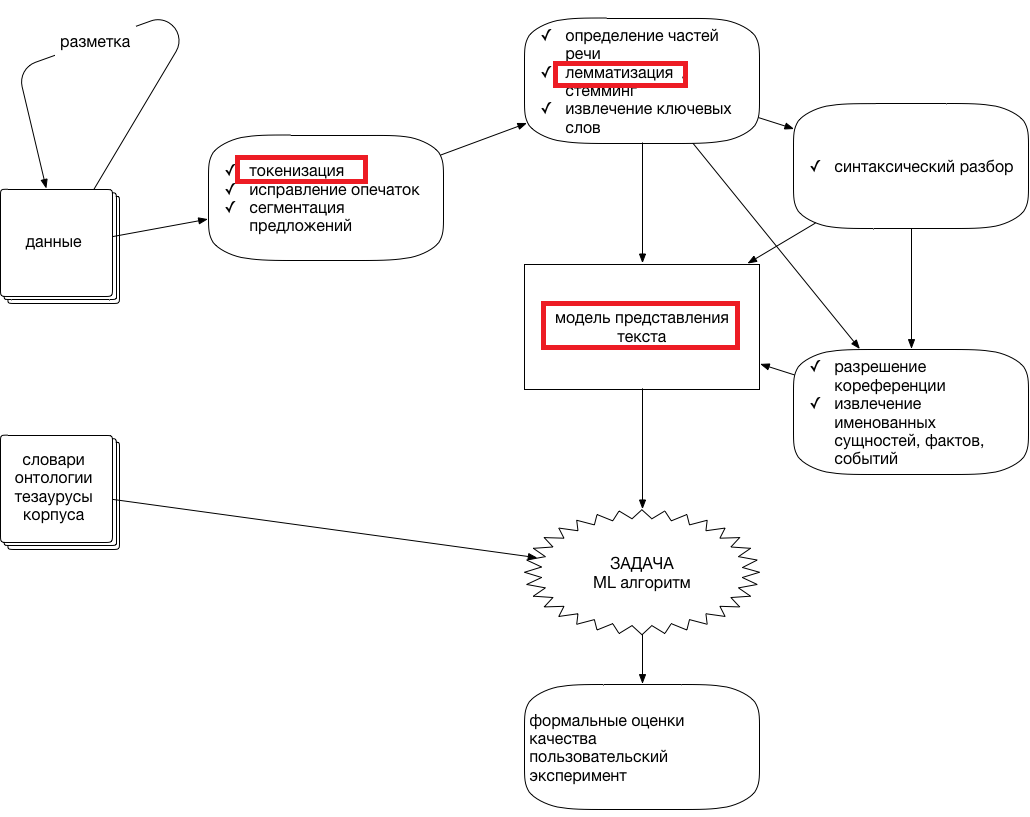